In [1]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [2]:
! kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:07<00:00, 112MB/s] 
100% 1.06G/1.06G [00:07<00:00, 151MB/s]


In [3]:

import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
# Define dataset paths
train_dir = "/content/train"
test_dir = "/content/test"

dogs = "/content/train/dogs"

In [5]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [6]:
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [9]:

# Load datasets using ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Get class labels
print(train_dataset.classes)  # Output: ['cats', 'dogs']
print(train_dataset.class_to_idx)

['cats', 'dogs']
{'cats': 0, 'dogs': 1}


In [10]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Check one batch of data
data_iter = iter(train_loader)
images, labels = next(data_iter)
print(f"Batch Image Shape: {images.shape}")
print(f"Batch Labels: {labels}")

Batch Image Shape: torch.Size([32, 3, 150, 150])
Batch Labels: tensor([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 0, 1, 1, 1, 1])


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CatDogCNN(nn.Module):
    def __init__(self):
        super(CatDogCNN, self).__init__()
        # Conv layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Pooling
        self.pool = nn.MaxPool2d(2, 2)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 18 * 18, 128)
        self.fc2 = nn.Linear(128, 2)  # 2 classes: Cat, Dog

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 18 * 18)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Model initialize kar
model = CatDogCNN()
print(model)

CatDogCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=20736, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)


In [12]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

train_dataset = torchvision.datasets.ImageFolder(root=train_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = torchvision.datasets.ImageFolder(root= test_dir, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [13]:
for images, labels in train_loader:
    print(f"Input shape: {images.shape}")
    break

Input shape: torch.Size([32, 3, 150, 150])


Epoch 1: Train Loss: 0.6189, Train Acc: 64.84%, Val Loss: 0.5228, Val Acc: 73.72%
Epoch 2: Train Loss: 0.5087, Train Acc: 74.63%, Val Loss: 0.4762, Val Acc: 77.58%
Epoch 3: Train Loss: 0.4335, Train Acc: 79.38%, Val Loss: 0.4490, Val Acc: 78.72%
Epoch 4: Train Loss: 0.3710, Train Acc: 83.17%, Val Loss: 0.4427, Val Acc: 80.62%
Epoch 5: Train Loss: 0.2931, Train Acc: 87.41%, Val Loss: 0.4399, Val Acc: 80.86%
Epoch 6: Train Loss: 0.2003, Train Acc: 91.83%, Val Loss: 0.5179, Val Acc: 81.60%
Epoch 7: Train Loss: 0.1109, Train Acc: 95.75%, Val Loss: 0.6140, Val Acc: 81.38%
Epoch 8: Train Loss: 0.0659, Train Acc: 97.67%, Val Loss: 0.7956, Val Acc: 80.46%
Epoch 9: Train Loss: 0.0417, Train Acc: 98.56%, Val Loss: 0.8325, Val Acc: 80.56%
Epoch 10: Train Loss: 0.0351, Train Acc: 98.80%, Val Loss: 1.0016, Val Acc: 80.84%


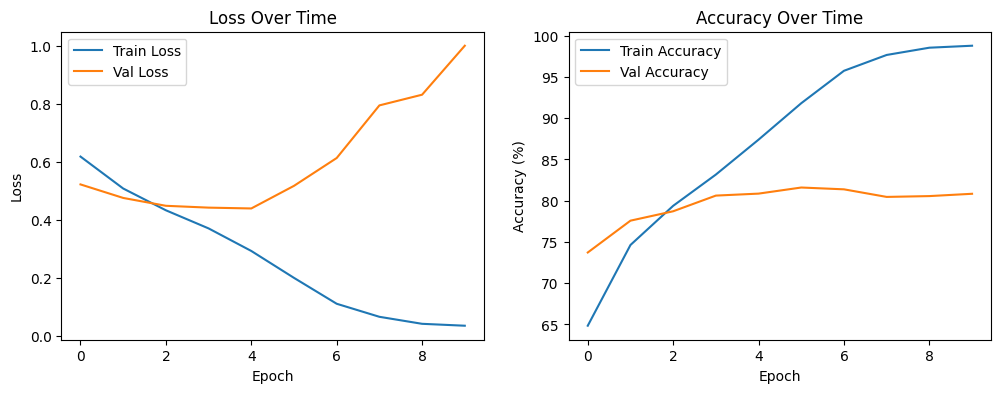

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Data loading
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.ImageFolder(root=train_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataset = torchvision.datasets.ImageFolder(root= test_dir, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Model
class CatDogCNN(nn.Module):
    def __init__(self):
        super(CatDogCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 18 * 18, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 18 * 18)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CatDogCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store metrics
train_losses, val_losses = [], []
train_accs, val_accs = [], []

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_acc = 100 * val_correct / val_total
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

# Plotting results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Accuracy Over Time')

plt.show()

Epoch 1: Train Loss: 0.6447, Train Acc: 62.47%, Val Loss: 0.5844, Val Acc: 70.82%
Epoch 2: Train Loss: 0.5471, Train Acc: 72.46%, Val Loss: 0.4934, Val Acc: 75.70%
Epoch 3: Train Loss: 0.4865, Train Acc: 76.62%, Val Loss: 0.4490, Val Acc: 79.18%
Epoch 4: Train Loss: 0.4524, Train Acc: 78.62%, Val Loss: 0.4479, Val Acc: 79.40%
Epoch 5: Train Loss: 0.4259, Train Acc: 80.81%, Val Loss: 0.4304, Val Acc: 80.08%
Epoch 6: Train Loss: 0.3991, Train Acc: 82.11%, Val Loss: 0.4840, Val Acc: 77.00%
Epoch 7: Train Loss: 0.3881, Train Acc: 83.06%, Val Loss: 0.4551, Val Acc: 78.44%
Epoch 8: Train Loss: 0.3792, Train Acc: 83.29%, Val Loss: 0.3718, Val Acc: 83.40%
Epoch 9: Train Loss: 0.3613, Train Acc: 84.36%, Val Loss: 0.4323, Val Acc: 81.64%
Epoch 10: Train Loss: 0.3500, Train Acc: 84.89%, Val Loss: 0.3633, Val Acc: 83.98%


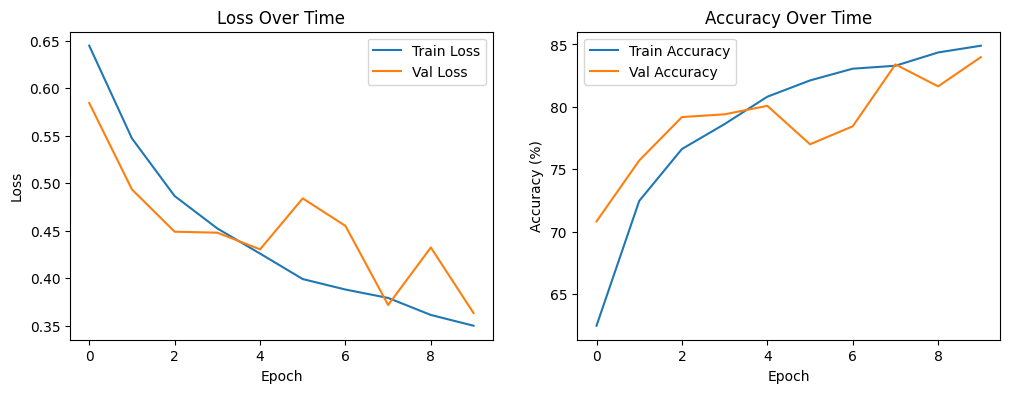

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Data_Augementation
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.ImageFolder(root=train_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataset = torchvision.datasets.ImageFolder(root= test_dir, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

import torch.nn as nn
import torch.nn.functional as F

class CatDogCNN(nn.Module):
    def __init__(self):
        super(CatDogCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 18 * 18, 128)
        self.dropout = nn.Dropout(p=0.3)  # Added dropout with 30% probability
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 18 * 18)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after fc1's activation
        x = self.fc2(x)
        return x

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CatDogCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store metrics
train_losses, val_losses = [], []
train_accs, val_accs = [], []

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_acc = 100 * val_correct / val_total
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

# Plotting results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Accuracy Over Time')

plt.show()